# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [119]:
# Libraries for data loading, data manipulation and data visulisation
#import *
import numpy as np
import pandas as pd
# Libraries for data preparation and model building
#import *
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 100

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [120]:
df = pd.read_csv('./data/df_train.csv', index_col=0)
test = pd.read_csv('./data/df_test.csv', index_col=0)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [121]:
# look at data statistics
df.describe()
df.info()
df.shape
df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000
8762,2017-12-31 21:00:00,4.333333,level_9,0.0,7.000000,78.666667,68.666667,20.000000,1.666667,33.333333,...,282.150000,287.483333,276.816667,281.020000,287.150000,285.150000,287.483333,281.396667,280.483333,2780.666667


In [122]:
#print(f'Mean: {test.Valencia_pressure.mean()}')
#print(f'Median: {test.Valencia_pressure.median()}')
#print(f'Mode: {test.Valencia_pressure.mode()}'
for i in df.columns.to_list():
    if (df[i].dtype =='float64' or df[i].dtype =='int64'):
        df[i].fillna(value=df[i].mean())
    else:
        df[i].fillna(value=df[i].mode())

In [123]:
# plot relevant feature interactions
features = ['Madrid_wind_speed','Bilbao_rain_1h','Valencia_wind_speed','Seville_humidity','Madrid_humidity',
           'Bilbao_clouds_all','Bilbao_wind_speed','Seville_clouds_all','Bilbao_wind_deg','Barcelona_wind_speed',
           'Barcelona_wind_deg','Madrid_clouds_all','Seville_wind_speed', 'Barcelona_rain_1h','Seville_rain_1h',
           'Bilbao_snow_3h','Barcelona_pressure','Seville_rain_3h','Madrid_rain_1h','Barcelona_rain_3h','Valencia_snow_3h',
           'Madrid_weather_id','Barcelona_weather_id','Bilbao_pressure','Seville_weather_id','Valencia_pressure',
           'Seville_temp_max','Madrid_pressure','Valencia_temp_max','Valencia_temp','Bilbao_weather_id','Seville_temp',
           'Valencia_humidity','Valencia_temp_min','Barcelona_temp_max','Madrid_temp_max','Barcelona_temp','Bilbao_temp_min',
           'Bilbao_temp','Barcelona_temp_min','Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp','Madrid_temp_min',
           'load_shortfall_3h']

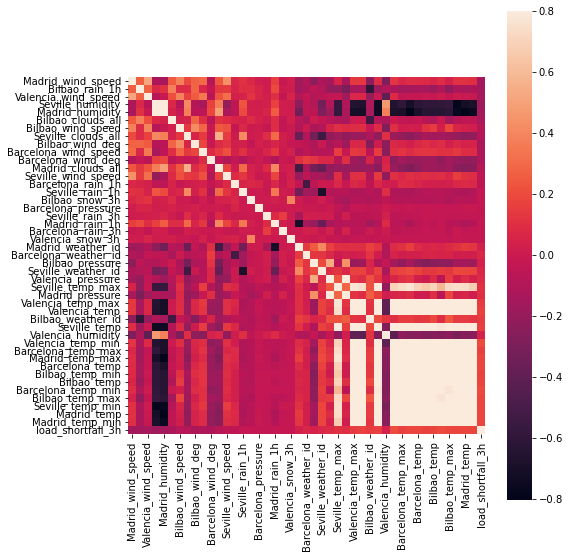

In [124]:
# evaluate correlation
df.corr()
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

array([[<AxesSubplot:title={'center':'Madrid_wind_speed'}>,
        <AxesSubplot:title={'center':'Bilbao_rain_1h'}>,
        <AxesSubplot:title={'center':'Valencia_wind_speed'}>,
        <AxesSubplot:title={'center':'Seville_humidity'}>,
        <AxesSubplot:title={'center':'Madrid_humidity'}>,
        <AxesSubplot:title={'center':'Bilbao_clouds_all'}>,
        <AxesSubplot:title={'center':'Bilbao_wind_speed'}>],
       [<AxesSubplot:title={'center':'Seville_clouds_all'}>,
        <AxesSubplot:title={'center':'Bilbao_wind_deg'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_deg'}>,
        <AxesSubplot:title={'center':'Madrid_clouds_all'}>,
        <AxesSubplot:title={'center':'Seville_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_1h'}>],
       [<AxesSubplot:title={'center':'Seville_rain_1h'}>,
        <AxesSubplot:title={'center':'Bilbao_snow_3h'}>,
        <AxesSubplot:title={'center':'Barce

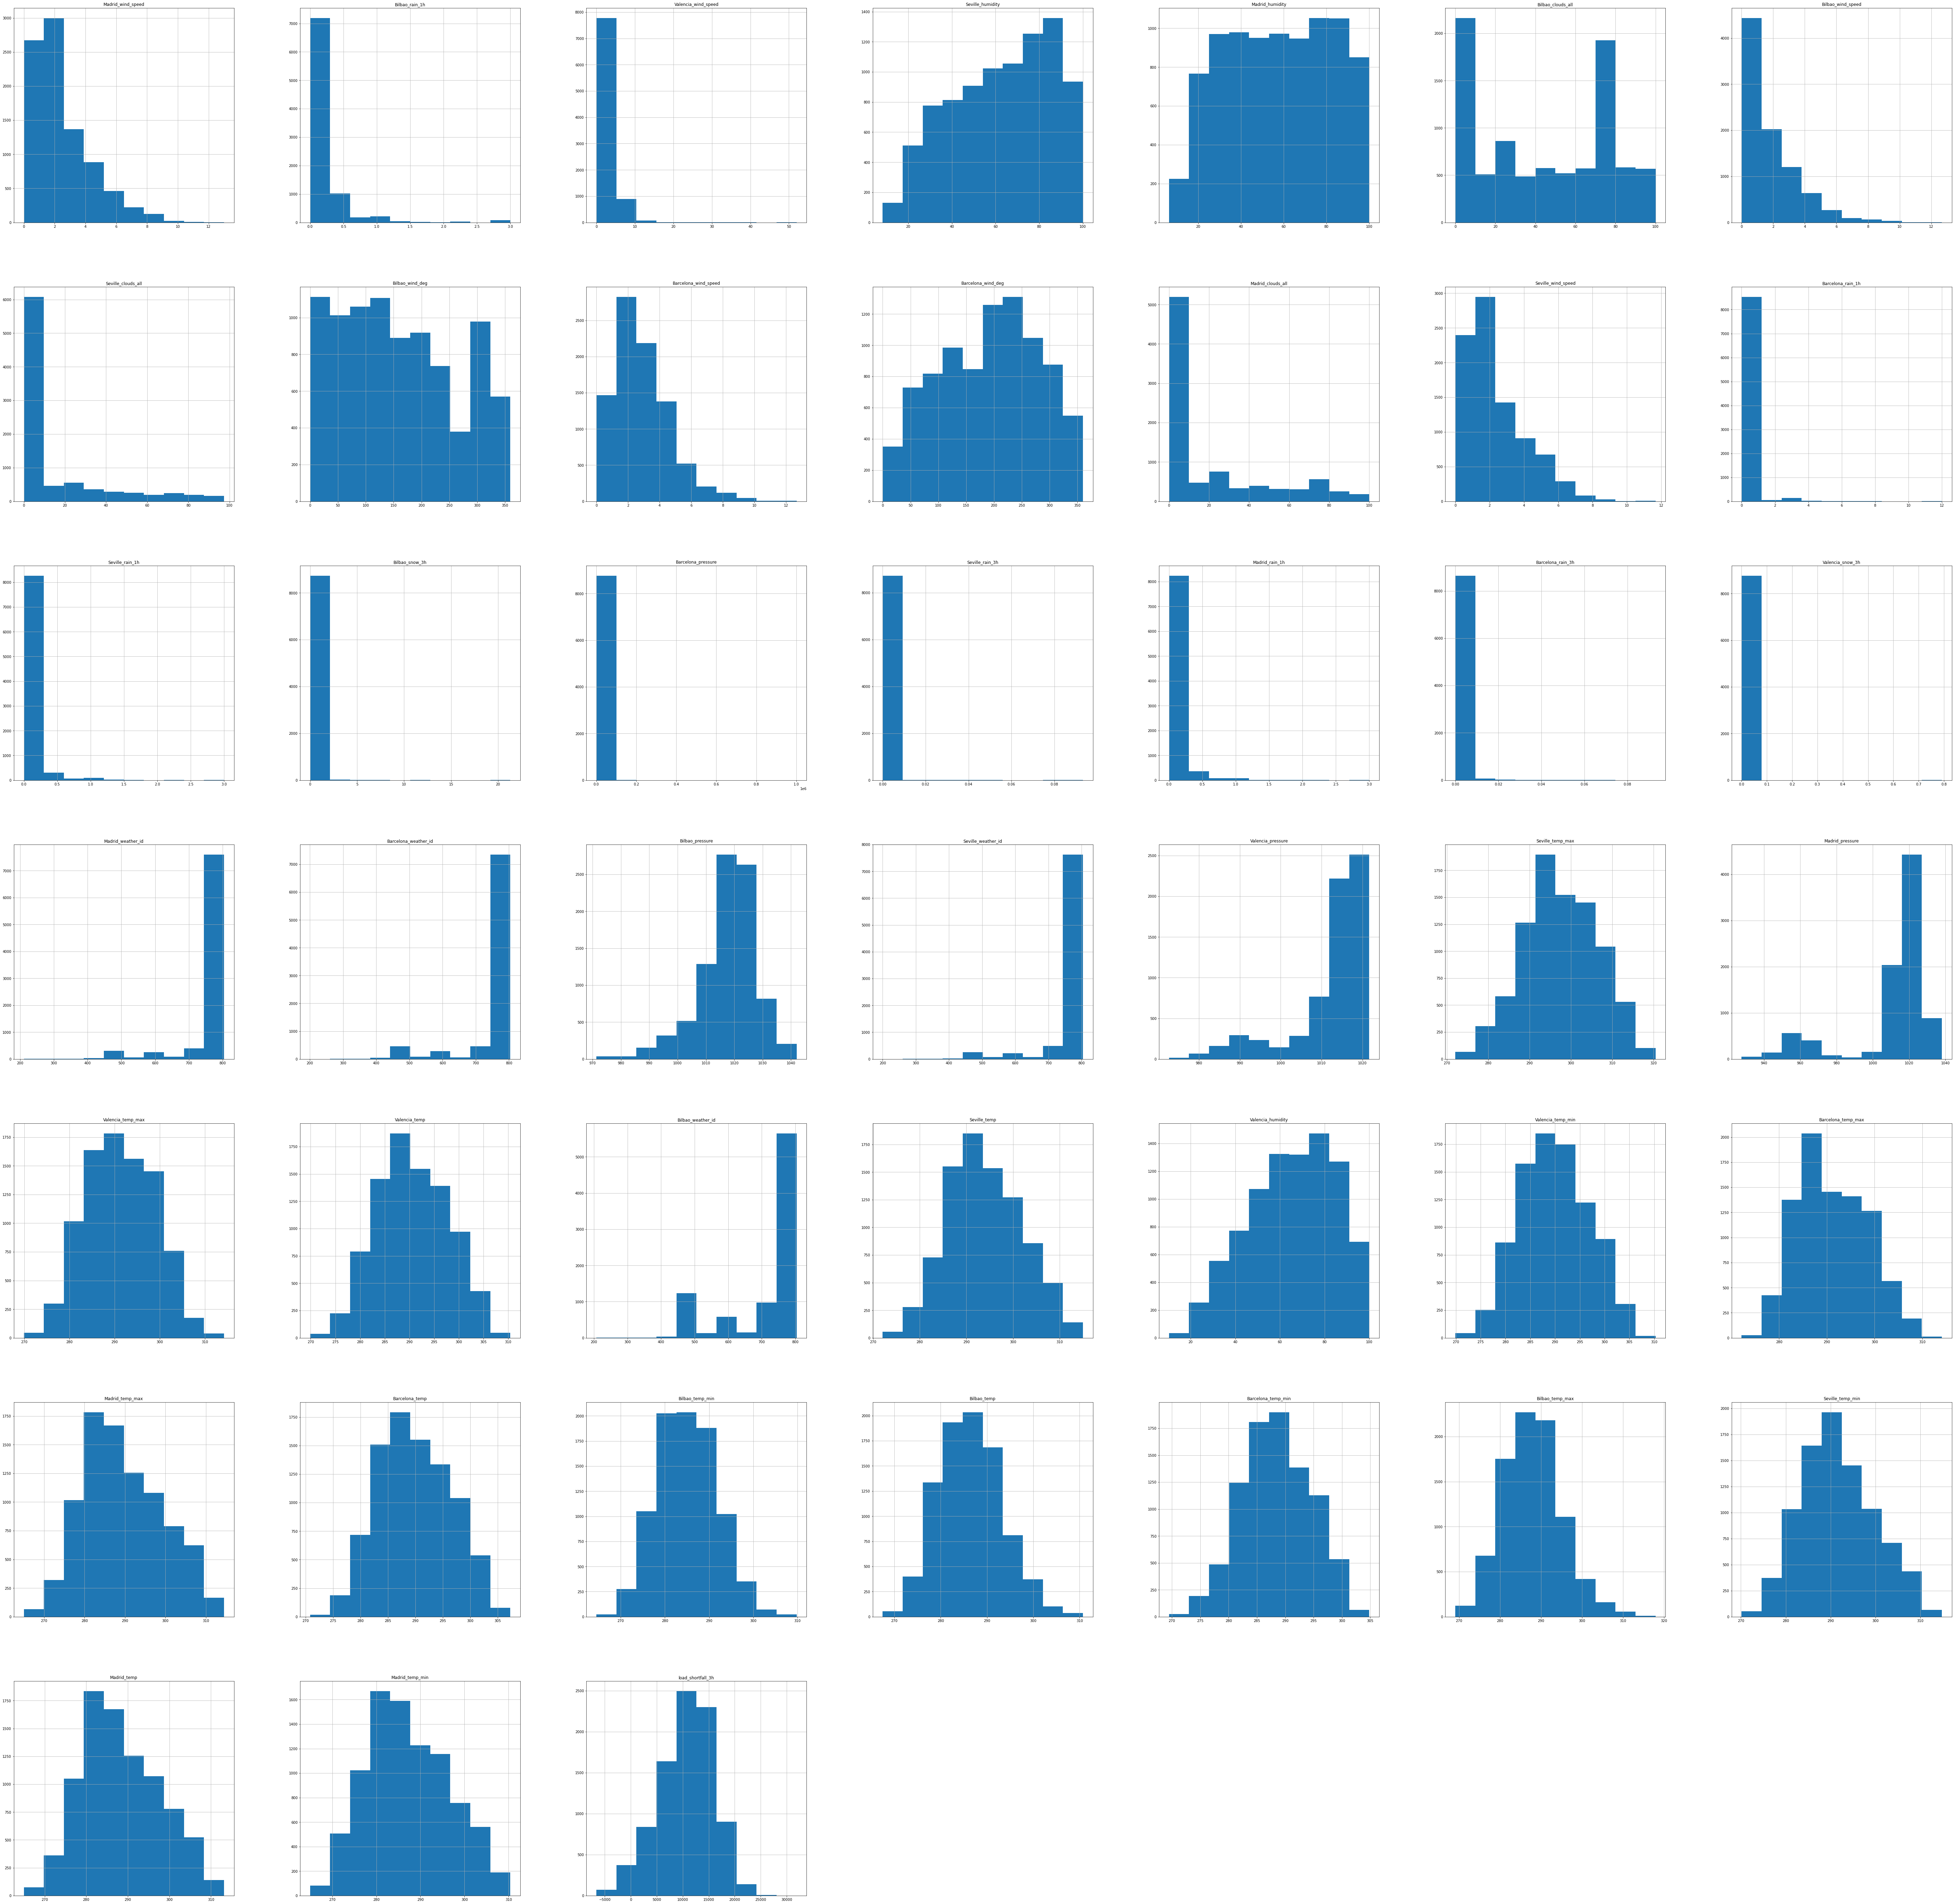

In [125]:
# have a look at feature distributions
df[features].hist(figsize=(100,100))

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [126]:
# remove missing values/ features
q = df['Valencia_pressure'].mean()
df.copy()
df['Valencia_pressure'].fillna(value=q, inplace=True)
df.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

In [127]:
# create new features

#data_mapping = {'level_1':1,'level_2':2,'level_3':3,'level_4':4,'level_5':5,'level_6':6,'level_7':7,'level_8':8,
               #'level_9':9,'level_10':10}
#df['Valencia_wind_deg_num'] = df['Valencia_wind_deg'].map(data_mapping)

dataMapping = {'sp1':1, 'sp2':2, 'sp3':3, 'sp4':4, 'sp5':5, 'sp6':6, 'sp7':7, 'sp8':8, 'sp9':9, 'sp10':10,
             'sp11':11, 'sp12':12, 'sp13':13, 'sp14':14, 'sp15':15, 'sp16':16, 'sp17':17, 'sp18':18, 'sp19':19, 
             'sp20':20, 'sp21':21, 'sp22':22, 'sp23':23, 'sp24':24, 'sp25':25} 
df['Seville_pressure_num'] = df['Seville_pressure'].map(dataMapping)

In [128]:
#df['Valencia_wind_deg'].values

In [129]:
#df.drop('Valencia_wind_deg',axis=1)
#df.drop('Seville_pressure',axis=1)
del df['Valencia_wind_deg']
del df['Seville_pressure']

In [130]:
# engineer existing features
df.time = pd.to_datetime(df.time)
df.dtypes

time                    datetime64[ns]
Madrid_wind_speed              float64
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id              float64
Barcelona_weather_id           float64
Bilbao_pressure                float64
Seville_weather_id       

In [131]:
#df['time'] = (df['time'] - df['time'].min())  / np.timedelta64(1,'D')
df['time']=pd.to_datetime(df['time'], infer_datetime_format=True) 
df['time']= pd.to_numeric(df['time'].dt.strftime("%Y%m%d%H%M%S"))
df


,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Seville_pressure_num
0,20150101030000,0.666667,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.000000,223.333333,...,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,25
1,20150101060000,0.333333,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.000000,221.000000,...,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,25
2,20150101090000,1.000000,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.000000,214.333333,...,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,25
3,20150101120000,1.000000,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.000000,199.666667,...,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,25
4,20150101150000,1.000000,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,185.000000,...,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,20171231090000,1.000000,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,226.666667,...,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333,23
8759,20171231120000,5.000000,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,220.000000,...,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667,23
8760,20171231150000,6.333333,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,283.333333,...,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000,22
8761,20171231180000,7.333333,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,220.000000,...,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000,23


In [132]:
x = df['time'].values
df['Seville_pressure_num']

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure_num, Length: 8763, dtype: int64

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [158]:
# split data
from sklearn.model_selection import train_test_split
y=df['load_shortfall_3h']
X=df.drop(['load_shortfall_3h'],axis=1)

In [160]:
df['load_shortfall_3h'].isnull().sum()

0

In [135]:
# create targets and features dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3332, random_state=50)


In [136]:
X_train

array([[2.01607290e+13, 2.33333333e+00, 0.00000000e+00, ...,
        2.99223333e+02, 2.98380000e+02, 5.00000000e+00],
       [2.01709220e+13, 1.00000000e+00, 3.00000000e-01, ...,
        2.92390000e+02, 2.91816667e+02, 1.00000000e+01],
       [2.01502202e+13, 2.00000000e+00, 3.00000000e-01, ...,
        2.85233333e+02, 2.84716667e+02, 2.10000000e+01],
       ...,
       [2.01711070e+13, 6.66666667e-01, 0.00000000e+00, ...,
        2.77816667e+02, 2.77483333e+02, 1.50000000e+01],
       [2.01702211e+13, 1.00000000e+00, 0.00000000e+00, ...,
        2.71097000e+02, 2.71097000e+02, 2.10000000e+01],
       [2.01612012e+13, 1.33333333e+00, 0.00000000e+00, ...,
        2.83750000e+02, 2.81150000e+02, 1.80000000e+01]])

In [137]:
# create one or more ML models
from sklearn.linear_model import LinearRegression

In [138]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [139]:
# evaluate one or more ML models
a = float(model.intercept_)

In [140]:
b = model.coef_

In [141]:
print("Slope:\t\t", b)
print("Intercept:\t", float(a))

Slope:		 [ 5.88859746e-09 -2.62175948e+02 -2.80265876e+02 -9.76513932e+01
 -4.43731423e+01  2.35757221e+00 -4.60041583e+00 -8.67057572e+01
  2.17766499e+00 -1.92522087e+00 -6.72052307e+01 -3.36702730e+00
  7.98759053e+00 -1.53289128e+01 -2.09140539e+02  1.09574985e+03
  1.98306027e+02 -1.48666342e-02 -2.74524550e+04  8.53587208e+02
 -3.04998904e+04 -3.62473295e+04  3.99274914e-01  1.09974120e+00
 -1.97695134e+01  1.44008313e+00  2.73597672e+01 -5.27792886e+01
  1.29284054e+01 -2.34896570e+02 -1.92522453e+02  1.78935414e+00
  9.53028477e+01  2.05991643e+01  4.96185670e+02 -2.72065472e+02
 -2.57909916e+02  7.15999330e+02  6.41045077e+02 -1.14136457e+03
 -3.51251754e+02  5.31470660e+02 -1.59355798e+02  5.57005779e+02
 -2.45793953e+02  4.89084891e+01]
Intercept:	 -165849.5941109489


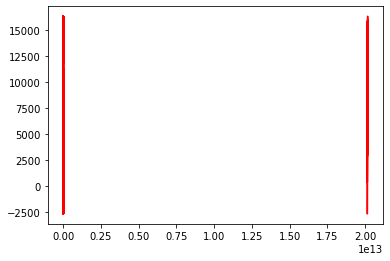

In [142]:
gen_y = model.predict(X_train)

# Plot the results
#plt.scatter(X_train, y_train, color='green')  # Plot the training data in green
plt.plot(X_train, gen_y, color='red')  # Plot the line connecting the generated y-values
plt.show()


In [143]:
from sklearn import metrics

In [144]:
print("Training:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, gen_y))

Training:
MSE: 22823051.31374206
R_squared: 0.15202039004895818


In [145]:
# Generate values of y from x, using the linear model
gen_y_test = model.predict(X_test)

# Plot the results
#plt.scatter(X_test, y_test, color='darkblue')

In [146]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

Testing:
MSE: 24229913.725376274
R_squared: 0.12984881237354862


In [147]:
gen_y_test

array([12951.6756727 , 13790.57309014, 11717.87395912, ...,
       13113.81561428, 11701.90516382, 12868.25595207])

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [148]:
# Compare model performance

In [149]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [150]:
# discuss chosen methods logic

In [151]:
submissions = test[['time']]

In [152]:
submissions['load_shortfall_3h'] = gen_y_test

In [153]:
submissions

,time,load_shortfall_3h
8763,2018-01-01 00:00:00,12951.675673
8764,2018-01-01 03:00:00,13790.573090
8765,2018-01-01 06:00:00,11717.873959
8766,2018-01-01 09:00:00,15097.958816
8767,2018-01-01 12:00:00,12618.521287
...,...,...
11678,2018-12-31 09:00:00,12693.018202
11679,2018-12-31 12:00:00,10059.497840
11680,2018-12-31 15:00:00,13113.815614
11681,2018-12-31 18:00:00,11701.905164


In [154]:
submissions.to_csv("submission_cbb4.csv", index = None)

In [155]:
submissions.shape

(2920, 2)

In [156]:
import pickle

model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)